In [11]:
import sys, os

In [12]:
def get_root_path(n):
    '''
    Esta función nos permite iterar sobre carpetas para añadir el path de nuestra carpeta raíz
    Argumentos:
        - n (int): el número de veces que iteraremos para llegar a la carpeta deseada
    '''
    path = os.getcwd() # para notebook ||| __file__ --> para .py
    for i in range(n):
        path = os.path.dirname(path)
        print('---------------')
        print(path)
        print('---------------')
    sys.path.append(path)

get_root_path(n=1)
print()
sys.path

---------------
/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/SRC
---------------



['/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/SRC/Notebooks',
 '/Users/valdecantos/.vscode/extensions/ms-toolsai.jupyter-2021.10.1101450599/pythonFiles',
 '/Users/valdecantos/.vscode/extensions/ms-toolsai.jupyter-2021.10.1101450599/pythonFiles/lib/python',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions',
 '/Users/valdecantos/.ipython',
 '/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/SRC',
 '/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/SRC']

In [13]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from Utils.preprocesado1 import preprocesado as prep1


In [14]:

trenes = pd.read_csv("/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/SRC/Data/RAW/viajes-en-tren-sample.csv")

In [15]:
DF_modificado = prep1(trenes);
DF_modificado.info()

/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/SRC/Utils/preprocesado1.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  df['vehicle_type'] = df['vehicle_type'].str.replace('REGIONAL.','REG.EXP')
/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/SRC/Utils/preprocesado1.py:41: FutureWarning: The default value of regex will change from True to False in a future version.
  df['vehicle_type'] = df['vehicle_type'].str.replace('REG.EXP.','REG.EXP')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   duration          1000000 non-null  float64
 1   price             1000000 non-null  float64
 2   seats             1000000 non-null  int64  
 3   origin_le         1000000 non-null  int64  
 4   destination_le    1000000 non-null  int64  
 5   vehicle_type_le   1000000 non-null  int64  
 6   vehicle_class_le  1000000 non-null  int64  
 7   fare_le           1000000 non-null  int64  
 8   Month             1000000 non-null  int64  
 9   Day               1000000 non-null  int64  
 10  Day of the week   1000000 non-null  int64  
 11  Hour              1000000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 91.6 MB


In [16]:
DF_modificado

,duration,price,seats,origin_le,destination_le,vehicle_type_le,vehicle_class_le,fare_le,Month,Day,Day of the week,Hour
0,2.75,64.25,325,3,0,2,0,2,1,26,1,16
1,1.78,33.50,289,0,8,2,0,2,2,12,4,8
2,3.32,41.85,181,3,2,2,2,2,1,21,3,13
3,6.58,28.35,188,3,6,7,0,0,2,21,6,6
4,6.25,43.50,207,3,0,2,2,2,10,27,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.80,37.40,250,1,3,2,0,2,11,5,3,11
999996,2.67,28.50,217,0,6,3,0,2,11,18,2,10
999997,3.00,108.90,250,3,0,2,0,1,11,9,0,12
999998,2.68,68.20,255,3,4,2,0,2,10,31,5,9


In [17]:
X = DF_modificado[['duration','seats','origin_le','destination_le','vehicle_type_le','vehicle_class_le','fare_le','Month','Day','Day of the week','Hour']]
y = DF_modificado["price"]

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [19]:
model_RF = RandomForestRegressor(n_estimators= 50)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)
model_RF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [20]:
model_RF.predict(X_test)

y_pred = model_RF.predict(X_test)

In [21]:
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE", mean_absolute_error(y_test, y_pred))
print('R2 score', r2_score(y_test, y_pred))

MSE 5.880640842878685
RMSE 2.4250032665707244
MAE 0.7421072106936137
R2 score 0.9845162350709777


In [22]:
import pickle

filename = 'trenes_Randomforest_model'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(model_RF, archivo_salida)

In [35]:
#Hacemos un feature importance

my_dict = {'features': ['duration','seats','origin_le','destination_le','vehicle_type_le','vehicle_class_le','fare_le','Month','Day','Day of the week','Hour'],
           'importances': model_RF.feature_importances_}

pd.DataFrame(my_dict).sort_values('importances', ascending=False)

,features,importances
0,duration,0.380295
6,fare_le,0.202367
4,vehicle_type_le,0.135245
1,seats,0.066516
3,destination_le,0.047767
2,origin_le,0.043378
7,Month,0.034887
10,Hour,0.029601
9,Day of the week,0.023934
5,vehicle_class_le,0.018302


In [33]:
my_dict = {'features': ['Duración','Asiento','Origen','Destino','Tipo de tren','Clase','Tarifa','Mes','Día','Día de la semana','Hora'],
           'importances': model_RF.feature_importances_}

Importancia = pd.DataFrame(my_dict).sort_values('importances', ascending=False)

([<matplotlib.axis.XTick at 0x7fab46217450>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

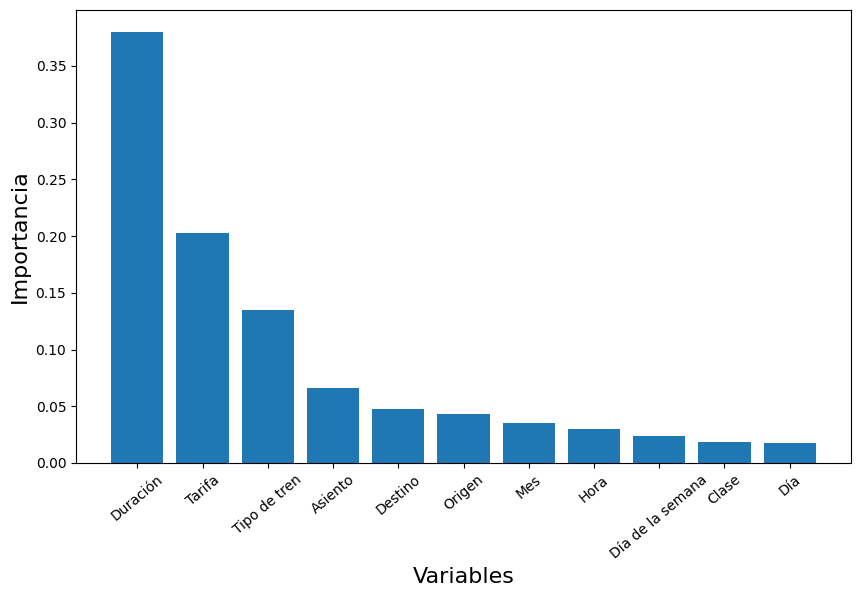

In [34]:
features = Importancia['features']
importances = Importancia['importances']

# Create bars
plt.figure(figsize=(10,6), dpi=100)
plt.bar(features, importances)
plt.xlabel('Variables', fontsize=16)
plt.ylabel('Importancia', fontsize=16)
# Create names on the x-axis
plt.xticks(features, rotation=40)

Al tratar de mejorar el modelo eliminando la columna 'Day' no obtengo un mejor resultado. Parece ser que el conjunto de datos está muy ajustado

In [32]:
mejora1 = DF_modificado.drop('Day', axis=1)

In [33]:
mejora1

,duration,price,seats,origin_le,destination_le,vehicle_type_le,vehicle_class_le,fare_le,Month,Day of the week,Hour
0,2.75,64.25,325,3,0,2,0,2,1,1,16
1,1.78,33.50,289,0,8,2,0,2,2,4,8
2,3.32,41.85,181,3,2,2,2,2,1,3,13
3,6.58,28.35,188,3,6,7,0,0,2,6,6
4,6.25,43.50,207,3,0,2,2,2,10,1,7
...,...,...,...,...,...,...,...,...,...,...,...
999995,1.80,37.40,250,1,3,2,0,2,11,3,11
999996,2.67,28.50,217,0,6,3,0,2,11,2,10
999997,3.00,108.90,250,3,0,2,0,1,11,0,12
999998,2.68,68.20,255,3,4,2,0,2,10,5,9


In [34]:
X_M1 = DF_modificado[['duration','origin_le','destination_le','vehicle_type_le','vehicle_class_le','fare_le','Month','Day','Day of the week','Hour']]
y_M1 = DF_modificado["price"]

In [35]:
model_RF_M1 = RandomForestRegressor(n_estimators= 50)
X_train_M1, X_test_M1, y_train_M1, y_test_M1 = train_test_split(X_M1, y_M1 , test_size = 0.2)
model_RF_M1.fit(X_train_M1, y_train_M1)

RandomForestRegressor(n_estimators=50)

In [36]:
model_RF_M1.predict(X_test_M1)

y_pred_M1 = model_RF_M1.predict(X_test_M1)

In [37]:
print("MSE", mean_squared_error(y_test_M1, y_pred_M1))
print("RMSE", np.sqrt(mean_squared_error(y_test_M1, y_pred_M1)))
print("MAE", mean_absolute_error(y_test_M1, y_pred_M1))
print('R2 score', r2_score(y_test_M1, y_pred_M1))

MSE 22.88223651638247
RMSE 4.783538075147146
MAE 2.12107013873346
R2 score 0.9400951088052429
